In [1]:
# imports
import requests
import json
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import inspect

# settings to load data
mypath = '/Users/nancynyambura/Desktop/Digital Shaper Program/ScrumBusters/Frame 1/Telegram/data/04_raw_financial/'

onlyfiles = [mypath + f for f in listdir(mypath) if (isfile(join(mypath, f)))]

onlyfiles = [f for f in onlyfiles if 'simplified' in f ]


In [2]:
#%cd G:\Meine Ablage\TechLabs\Scam Busters
%cd /Users/nancynyambura/Desktop/Digital Shaper Program

/Users/nancynyambura/Desktop/Digital Shaper Program


In [3]:
time_to_pump = 5
expected_pump_row = -30

In [4]:
test_df = pd.read_csv(onlyfiles[7],index_col=0)
test_df['open_time'] = pd.to_datetime(test_df['open_time'],unit='ms') # turnes unix time to datetime
idxmax = (test_df.high/test_df.open).idxmax()
print(idxmax,(test_df.high/test_df.open)[idxmax])

5969 1.2489728841413312


In [5]:
max_possible_return = test_df.iloc[-30:-25].high.max() / test_df.iloc[-40:-31].low.min()

<AxesSubplot:>

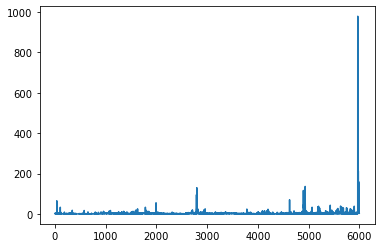

In [6]:
test_df.n_trades.plot()

<AxesSubplot:>

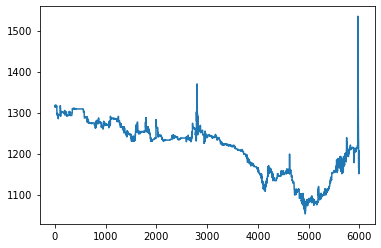

In [7]:
test_df.high.plot()

<AxesSubplot:>

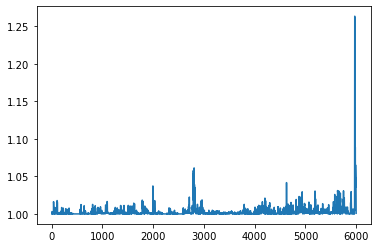

In [8]:
(test_df.high.rolling(5).max() / test_df.high.rolling(5).min()).plot()

In [9]:
def pump_success_indicator(file):
    df = pd.read_csv(file)
    high, open = df.high, df.open
    idx_indicator = (high/open).idxmax()
    indicator = (high/open)[idx_indicator]
    high_max=df['high'].rolling(2).max()
    open_max=df['open'].rolling(2).max()
    open_max = open_max.dropna().reset_index(drop=True)
    max_possible_return = df.iloc[-40:-25].high.max() / df.iloc[-40:-25].low.min()
    max_5m_return = (high_max/open_max).dropna().max()
    max_5m_return_idx = (high_max/open_max).dropna().idxmax()
    return {'indicator':indicator, 'idx_indicator':idx_indicator,
        'max_possible_return':max_possible_return}

all_indicators = pd.DataFrame([
    pump_success_indicator(file)
    for file
    in onlyfiles
])

In [10]:
all_indicators.sort_values('max_possible_return').iloc[50:]

,indicator,idx_indicator,max_possible_return
1,1.035714,5944,1.042424
11,1.047233,4593,1.048369
70,1.042990,521,1.054541
10,1.130515,653,1.134286
52,1.059480,5969,1.169471
62,1.136794,5969,1.197605
7,1.248973,5969,1.265458
63,1.328125,5969,1.360000
65,1.278150,5964,1.453287
31,1.467742,5969,1.523810


<AxesSubplot:>

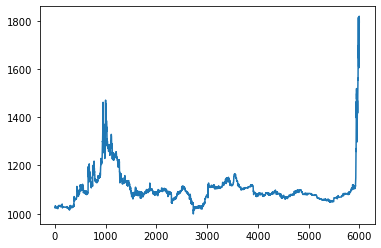

In [11]:
test_df = pd.read_csv(onlyfiles[10])
test_df.open.plot()

In [12]:
# cut dataframe to end just before the pump
def get_prepump_df(df):
    ()

In [13]:
def returns_before_pump(df,hours_to_pump):
    '''returns the ROI if investing hours_to_pump 
    number of hours before the exit and exiting
    time_to_pump minutes before the pump'''
    
    return 1

In [14]:
#SimpleFeatures



def summe(df,cols,colname):
    res = [
        df.loc[col, colname].sum()
        for col in cols
    ]
    return res

def schnitt(df,cols,colname):
    res = [
    df.loc[col, colname].mean()
    for col in cols
]
    return res

def maximum(df,cols,colname):
    res = [
        df.loc[col, colname].max()
        for col in cols
    ]
    return res

# logarithm of column^^
def logarithmus(df,cols):
    res = [
        df[col].log()
        for col in cols
    ]
    return res

# daily return
def verhaeltnis(df,cols):
    res = [
    (df[col]/df[cols])-1
    for col in cols
    ]
    return res



def standard(df,cols,colname):
    res = [
        df.loc[col, colname].std() 
            for col in cols
    ]
    return res

# maximum difference between 
def m_potential(df):
    res = (df['high']/df['open'])
    return res

#a prepump ?
def will_pump(df,cols,colname,s_val): # cut = -31 for pre pump data, s_val has range between 1-3
    for col in cols:
        sigma = s_val*standard(df,cols,colname) + schnitt(df,cols,colname)
        if maximum(df,cols,colname)>= sigma:
            return True
        else :
            return False
    
def is_pump(df,cols,s_val): # cut = -31 for pre pump data, s_val has range between 1-3
    df =df.iloc[:] 
    sigma = s_val*standard(df,cols) + schnitt(df,cols)
    if df[cols].max()>= sigma:
        return True
    else :
        return False

def start_bot(df):
    if will_pump() == True:
        t = df.open_time()       # hier soll der Zeitpunkt des ersten Wertes
        range_t = (-31) - t      # als t gespeicehrt werden, der den Sigma wert überschreitet
    return  range_t               
    

def trade_per_vol(df):
    a = df.n_trades.sum()
    b = df.volume.sum()
    c = a/b
    return c

#def admins_budget(df):  # could be an indicator of how much profit is expected
    # time_range = start_bot(df) - 31
    # sum of buyers volume
    # may indicate roi in percent.
    
# Im Intervall der Abweichung +- 3*Sigma
# vom Erwartungswert sind 99,73 % aller Messwerte zu finden.
# trading win without participating in the pump event. Buy 1 hour before and sell 2h after pump for eg


# more complex features and combining them to higher lvl features
#marcetcap data


#will_pump(df,cols=['volume'],s_val=3)

In [15]:
# full engineering for a single df
def compute_features(df):
    features = {
        'f01':summe(df,range(len(df)),'volume'),
        #'f02':maximum(df,range(len(df)),'volume'),
        #'f03':standard(df,range(len(df)),'volume'),
        #'f04':schnitt(df,range(len(df)),'volume'),
        #'f05':standard(df,range(len(df)),'n_trades'),
        'f06':will_pump(df,range(len(df)),'volume',2),
    }
    return features

In [16]:
# get all features
engineered_df=pd.DataFrame()
for j in onlyfiles:
    feature_list=compute_features(pd.read_csv(j))
    engineered_df= engineered_df.append(feature_list,ignore_index=True)

print (engineered_df)



                                                  f01  f06
0   [140.3, 295.3, 0.0, 0.0, 0.0, 332.4, 0.0, 950....  1.0
1   [0.0, 0.0, 3301.0, 0.0, 0.0, 0.0, 355.0, 4527....  1.0
2   [683.0, 52.0, 0.0, 11925.0, 15124.0, 0.0, 4175...  1.0
3   [39.0, 163.0, 1027.0, 164.0, 22.0, 18.0, 550.0...  1.0
4   [1330.0, 748.0, 1292.0, 1636.0, 2020.0, 1043.0...  1.0
..                                                ...  ...
66  [87.0, 760.0, 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0
67  [0.0, 19.5, 0.0, 0.0, 0.0, 0.0, 0.0, 62.7, 0.0...  1.0
68  [15413.0, 14257.0, 2959.0, 35684.0, 13477.0, 8...  1.0
69  [88.6, 100.0, 0.0, 141.04, 0.0, 0.0, 158.95, 4...  1.0
70  [379.0, 0.0, 0.0, 1638.0, 33.0, 486.0, 0.0, 0....  1.0

[71 rows x 2 columns]


In [17]:
# add the label
# pump column
'''pump_column = pd.read_csv('/Users/nancynyambura/Desktop/Digital Shaper Program/ScrumBusters/Frame 1/Telegram/data/label_dataset - [filename_suspicious_messages].csv')
pump_column['datetime'] = [pump_column['datetime'].values[i].strip('+00:00%')
    for i in range(len(pump_column))]
engineered_df = pd.merge(engineered_df, pump_column, left_on= 'coinnames', right_on='coin', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)'''



"pump_column = pd.read_csv('/Users/nancynyambura/Desktop/Digital Shaper Program/ScrumBusters/Frame 1/Telegram/data/label_dataset - [filename_suspicious_messages].csv')\npump_column['datetime'] = [pump_column['datetime'].values[i].strip('+00:00%')\n    for i in range(len(pump_column))]\nengineered_df = pd.merge(engineered_df, pump_column, left_on= 'coinnames', right_on='coin', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)"

In [18]:
'''# add market cap
market_cap_df = pd.read_csv('Frame 1\General history Data\Feature Engineering\market_cap.csv')
engineered_df = pd.merge(engineered_df, market_cap_df, left_on= 'coinnames', right_on='symbol', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)
engineered_df.market_cap = engineered_df.market_cap.fillna(market_cap_df.market_cap.min()*0.001)'''

"# add market cap\nmarket_cap_df = pd.read_csv('Frame 1\\General history Data\\Feature Engineering\\market_cap.csv')\nengineered_df = pd.merge(engineered_df, market_cap_df, left_on= 'coinnames', right_on='symbol', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)\nengineered_df.market_cap = engineered_df.market_cap.fillna(market_cap_df.market_cap.min()*0.001)"

In [19]:
engineered_df.to_csv('Samples/financial_data/engineered/sample.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Samples/financial_data/engineered/sample.csv'